In [1]:
import torch
import torchvision

import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.optim import Adam

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
class MnistAutoEncoder(nn.Module):
    def __init__(self):
        super(MnistAutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 4, 5),
            nn.ReLU(),
            nn.Conv2d(4, 8, 5),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(3200, 10),
            nn.Softmax(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(10, 400),
            nn.ReLU(),
            nn.Linear(400, 4000),
            nn.ReLU(),
            nn.Unflatten(1, (10, 20, 20)),
            nn.ConvTranspose2d(10, 10, kernel_size=5),
            nn.ConvTranspose2d(10, 1, kernel_size=5),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoder = self.encoder(x)

        decoder = self.decoder(encoder)

        return decoder

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

batch_size = 64
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [5]:
# model
model = MnistAutoEncoder().to(device)

# loss
loss_fn = nn.MSELoss()

# Optimizer
optimizer = Adam(model.parameters(), weight_decay=1e-5)

for epoch in range(100):
    for i, data in enumerate(train_loader):
        inputs = data[0].to(device)
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
    
        # output of model
        outputs = model(inputs)
        
        loss = loss_fn(outputs, inputs)
        loss.backward()
    
        optimizer.step()
        
        if i % 200 == 0:
            print(epoch, i)
            print(loss.item())
            print('---------')

torch.save([model], "Mnist Auto Encoder.pth")

C:\Users\Dima\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 0
1.2414915561676025
---------
0 200
0.8037430047988892
---------
0 400
0.7943616509437561
---------
0 600
0.8102613091468811
---------
0 800
0.7769907712936401
---------
1 0
0.792291522026062
---------
1 200
0.6965847015380859
---------
1 400
0.6902875304222107
---------
1 600
0.6485673189163208
---------
1 800
0.600151538848877
---------
2 0
0.58892422914505
---------
2 200
0.6005082726478577
---------
2 400
0.5901245474815369
---------
2 600
0.5918533802032471
---------
2 800
0.5588521361351013
---------
3 0
0.5794047713279724
---------
3 200
0.5732124447822571
---------
3 400
0.5434736013412476
---------
3 600
0.5551636815071106
---------
3 800
0.55513995885849
---------
4 0
0.576863169670105
---------
4 200
0.5712722539901733
---------
4 400
0.555478572845459
---------
4 600
0.5605602264404297
---------
4 800
0.5602556467056274
---------
5 0
0.5429408550262451
---------
5 200
0.5413244962692261
---------
5 400
0.5647642612457275
---------
5 600
0.5252890586853027
---------
5 800

In [16]:
def plot(img):
    np_img = img.cpu().numpy()
    plt.axis("off")
    plt.imshow(np_img.squeeze(), cmap="gray")
    plt.show()

In [103]:
index = 15
z = test_set[index][0].to(device)
img = torch.reshape(z, (1, 1, 28, 28))
a = model.encoder(img)
a

tensor([[0.0170, 0.3534, 0.0757, 0.0865, 0.0949, 0.0430, 0.0308, 0.0406, 0.0163,
         0.2417]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

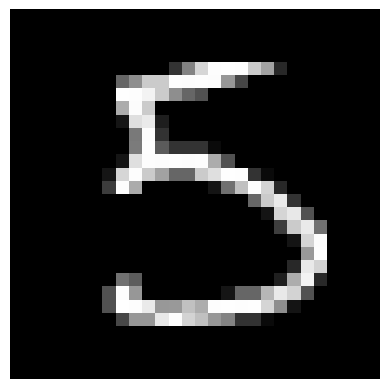

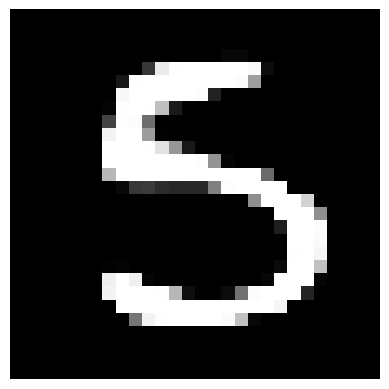

In [104]:
with torch.no_grad():
    model.eval()
    
    # outputs_test = model(all_test_inputs)
    output = model(img)

plot(img)
plot(output)

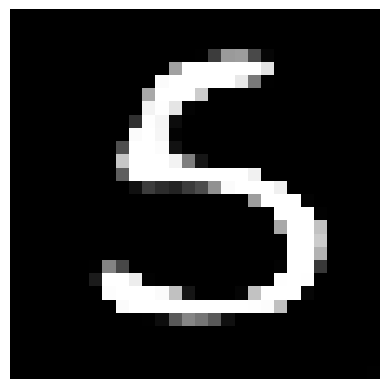

In [119]:
with torch.no_grad():
    tens = torch.tensor([[0.0170, 0.3534, 0.12757, 0.0865, 0.0949, 0.0430, 0.0308, 0.0406, 0.0163, 0.2417]]).to(device)
    i = model.decoder(tens)

plot(i)